# Amirs project


---

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D

## Plot configurations

In [2]:
%matplotlib inline
plt.style.use("fivethirtyeight")
plt.rcParams['figure.figsize'] = 16, 10

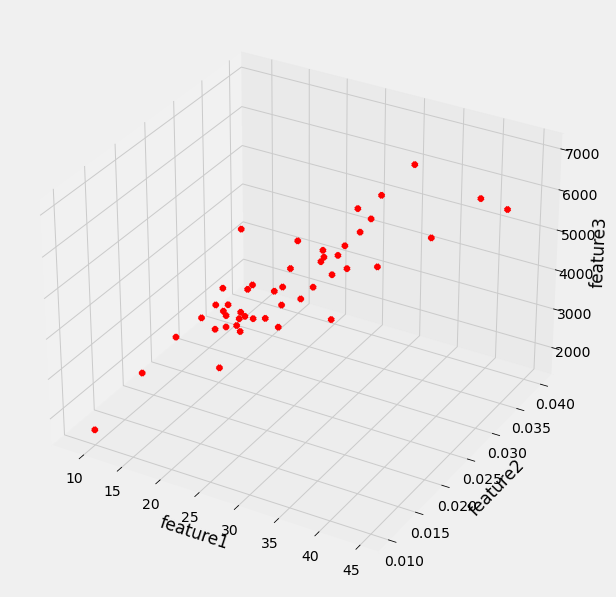

In [3]:
data = pd.read_csv(r"C:\Users\Pouya\Desktop\ML\amirs project\regression\DATA_ANN_Edited.txt", header = None)
data.columns = ['feature1', 'feature2', 'feature3']
        
ax = plt.axes(projection = '3d')
ax.scatter(data['feature1'], data['feature2'], data['feature3'], c = 'r', alpha = 1, marker = 'x')
ax.set_xlabel('feature1')
ax.set_ylabel('feature2')
ax.set_zlabel('feature3')
plt.show()

## Feature normalization

C:\Users\Pouya\AppData\Local\Temp/ipykernel_18244/324728955.py:9: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X[:,0], X[:,1], y, c = 'r', alpha = 1, marker = 'x', edgecolor = 'none');


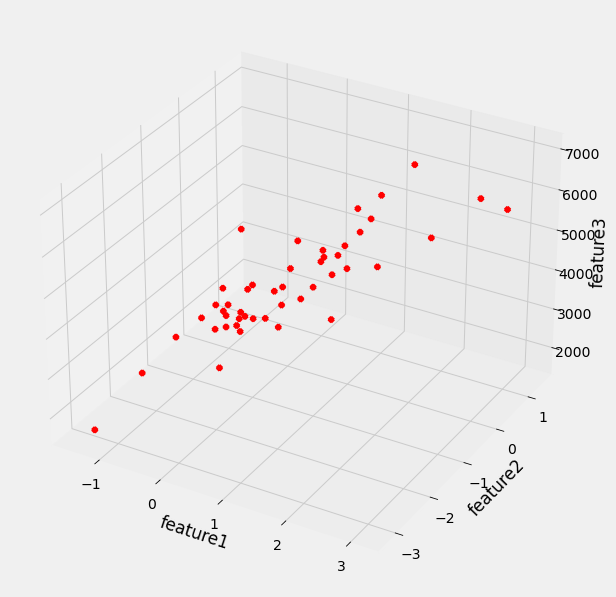

In [4]:
X = np.array([data['feature1'], data['feature2']]).T
y = np.array([data['feature3']]).T

mu = np.mean(X, axis = 0)
sigma = np.std(X, axis = 0, ddof = 1) 
X = (X - mu)/sigma

ax = plt.axes(projection = '3d')
ax.scatter(X[:,0], X[:,1], y, c = 'r', alpha = 1, marker = 'x', edgecolor = 'none');
ax.set_xlabel('feature1')
ax.set_ylabel('feature2')
ax.set_zlabel('feature3')
plt.show()

## Cost function

In [5]:
def cost_func(X, y, theta) :
    return (0.5 / X.shape[0]) * np.sum((np.dot(X, theta) - y) ** 2, dtype = float) 

## Gradient descent

In [6]:
def gradient_descent(X, y, theta, alpha, iterations) :
    J_history = np.zeros((iterations, 1))
    m = X.shape[0]
    for i in range(iterations):
        J_der = np.dot(X, theta) - y
        theta = theta - (alpha / m) * np.dot(J_der.T, X).T
        J_history[i] = cost_func(X, y, theta)
    return theta, J_history 

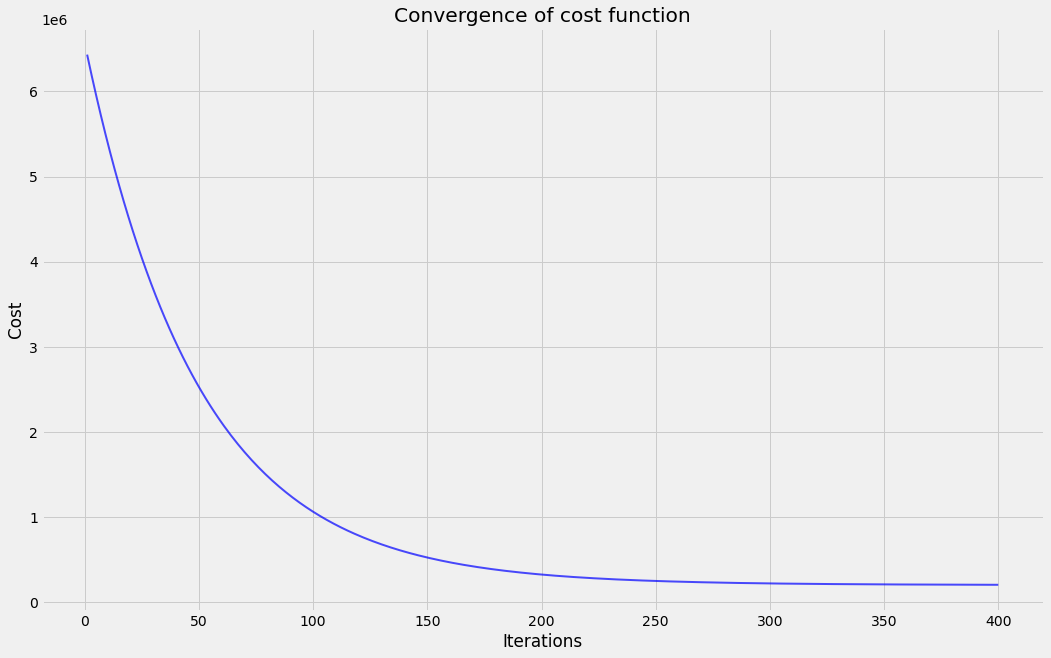

In [7]:
alpha = 0.01
iterations = 400
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis = 1)
theta = np.zeros((X.shape[1], 1))

[theta, J_history] = gradient_descent(X, y, theta, alpha, iterations)

plt.plot(np.linspace(1, 400, 400), J_history, 'b', alpha = 0.7, label = 'function',  linewidth = 2)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Convergence of cost function')
plt.show()

In [8]:
theta

array([[3343.02063993],
       [1041.75818253],
       [ -19.57517159]])

In [9]:
Y = np.zeros((X.shape[0], 1))
for i in range(X.shape[0]):
    Y[i] = np.dot(X[i], theta) 
Y = np.meshgrid(Y[:,0], Y[:,0])[0]
X1, X2 = np.meshgrid(X[:,1], X[:,2])

C:\Users\Pouya\AppData\Local\Temp/ipykernel_18244/3619718529.py:2: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X[:,1], X[:,2], y, c = 'r', alpha = 1, marker = 'x', edgecolor = 'none');


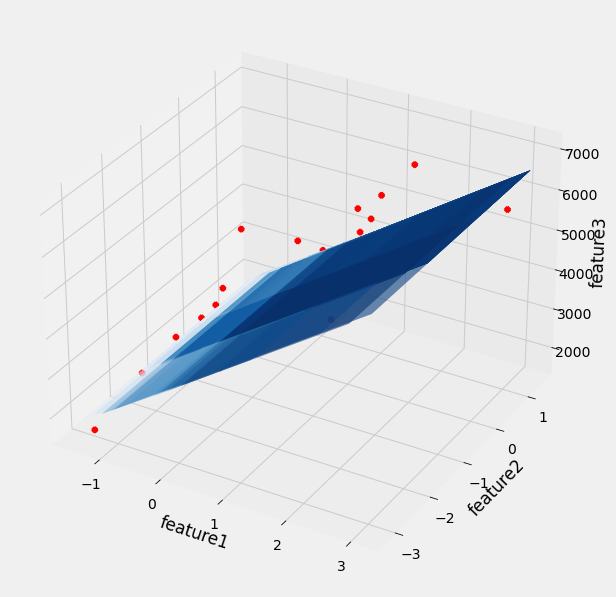

In [10]:
ax = plt.axes(projection = '3d')
ax.scatter(X[:,1], X[:,2], y, c = 'r', alpha = 1, marker = 'x', edgecolor = 'none');
ax.plot_surface(X1, X2, Y, cmap = 'Blues', alpha = 0.2)
# ax.view_init(5, -90)
ax.set_xlabel('feature1')
ax.set_ylabel('feature2')
ax.set_zlabel('feature3')
plt.show()

C:\Users\Pouya\AppData\Local\Temp/ipykernel_18244/3006324147.py:3: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[:,1], y, c = 'r', alpha = 1, marker = 'x', edgecolor = 'none');


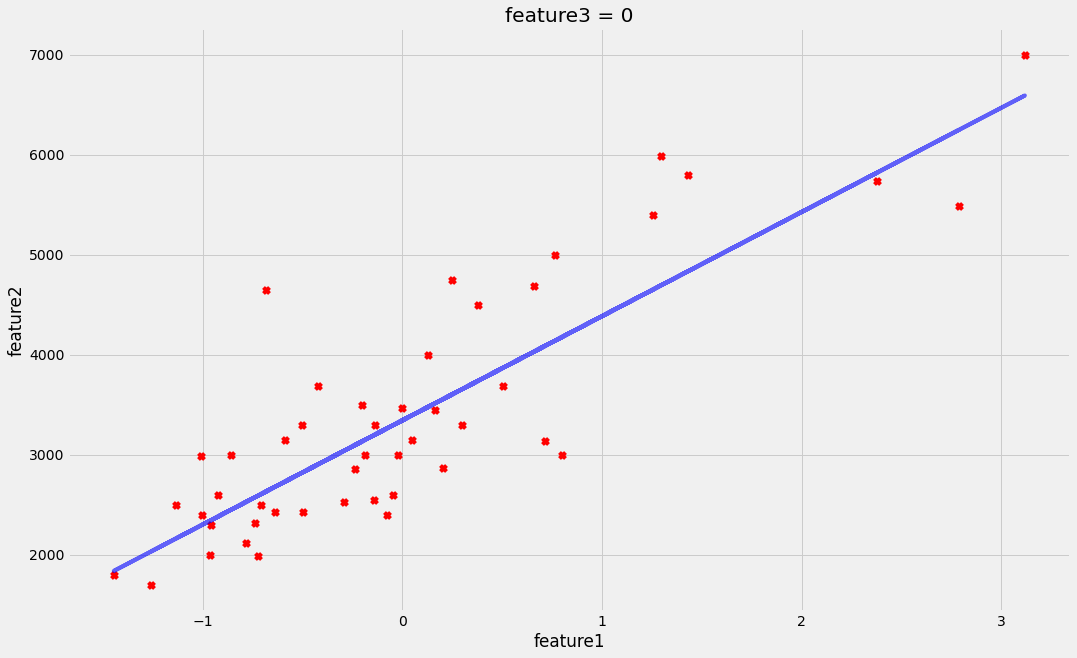

In [11]:
X0 = X.copy()
X0[:,2][:] = 0
plt.scatter(X[:,1], y, c = 'r', alpha = 1, marker = 'x', edgecolor = 'none');
plt.plot(X[:,1], np.dot(X0, theta), c = 'b', alpha = 0.6)
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.title('feature3 = 0')
plt.show()